In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

In [2]:
def smooth_data(data, width):
    smoothed = []
    for ii in range(len(data) - width):
        smoothed.append(np.sum(data[ii: ii+width]) / width)
    return smoothed

def load_train_history(file_dir):
    file_names = os.listdir(file_dir)
    file_names = [file_name for file_name in file_names if file_name.startswith('epoch_')]
    csv_names = [file_name for file_name in file_names if file_name.endswith('.csv')]
    csv_names = sorted(csv_names, key=lambda x: int(x.split('_')[-1].strip('.csv')), reverse=False)
    
    full_df = None

    for csv_name in csv_names:
        file_path = os.path.join(file_dir, csv_name)
        df = pd.read_csv(file_path)
        full_df = df if full_df is None else pd.concat([full_df, df])
        
    return full_df

/tmp/ipykernel_66/128679617.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  smoothed.append(np.sum(data[ii: ii+width]) / width)


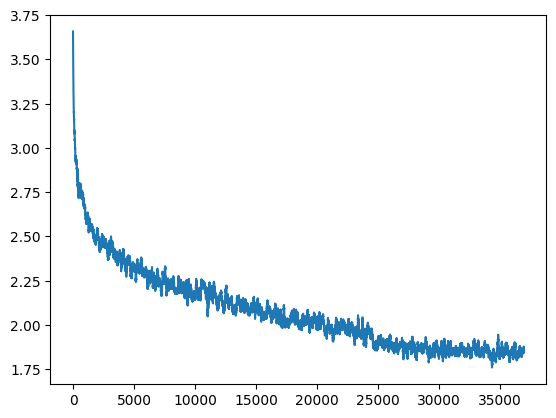

In [6]:
loss_record = load_train_history('models/unet_test4')['loss']
smoothed = smooth_data(loss_record, 100)

plt.plot(smoothed)
plt.show()

In [12]:
load_train_history('models/unet_test3')

,Unnamed: 0,0
0,0,12.067044
1,1,6.335122
2,2,5.935755
3,3,6.702555
4,4,6.343550
...,...,...
37066,37066,2.812547
37067,37067,2.511343
37068,37068,2.593340
37069,37069,3.013650
